In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("books.csv")

In [5]:
data

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


In [6]:
row, column = data.shape
print("No of Rows =", row, " No of Columns =", column)

No of Rows = 399  No of Columns = 24


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

In [8]:
x = data['original_title'].isnull().sum()
print(x,"books do not have an original title")

36 books do not have an original title


In [9]:
data.dropna(subset = ['original_title'], inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    363 non-null    int64  
 1   goodreads_book_id          363 non-null    int64  
 2   best_book_id               363 non-null    int64  
 3   work_id                    363 non-null    int64  
 4   books_count                363 non-null    int64  
 5   isbn                       354 non-null    object 
 6   isbn13                     355 non-null    float64
 7   authors                    363 non-null    object 
 8   original_publication_year  363 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      363 non-null    object 
 11  language_code              328 non-null    object 
 12  average_rating             363 non-null    float64
 13  ratings_count              363 non-null    int64  

In [11]:
print("Unique books present in the dataset =", len(data['book_id'].unique()))

Unique books present in the dataset = 363


In [12]:
print("Average rating of all books =", data['average_rating'].mean())

Average rating of all books = 3.9870798898071644


In [13]:
x = len(data[data['original_publication_year'] == 2000])
print("No of rows published in the year 2000 =", x)

No of rows published in the year 2000 = 7


In [14]:
val = data['work_ratings_count'].max()
x = data[data['work_ratings_count'] == val]
print("Book with maximum ratings =", x['title'][0])

Book with maximum ratings = The Diary of a Young Girl


In [15]:
labels = [1,2,3,4,5,6,7,8,9,10]
data2 = pd.cut(data['average_rating'], [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], right = False, labels=labels)

<AxesSubplot:>

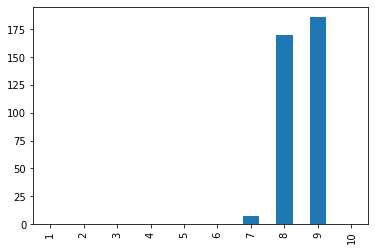

In [16]:
data2.value_counts().sort_index().plot(kind='bar')